In [3]:
import brian2 as b2
import matplotlib.pyplot as plt

# Ferret Visual Cortex

In [3]:
E_Na = 50 * b2.mV
g_Na = 0.05 * b2.siemens/b2.cm**2
g_Kd = 10e-3 * b2.siemens/b2.cm**2
E_Kd = -90 * b2.mV
tau_max = 4 * b2.second
g_Leak = 1.5e-4 * b2.siemens/b2.cm**2
E_Leak = -70 * b2.mV

L = 67 * b2.umetre
d = 67 * b2.umetre

C_membrane = (0.14 * b2.nfarad) / (b2.pi * L * d)
vt = - 56.2 * b2.mV

eqs = """
  dvm/dt = (1 / C_membrane) * Im : volt
  Im = I_Leak+I_Na+I_Kd+Iinj : amp/meter**2
  I_Leak = g_Leak*(E_Leak-vm) : amp/meter**2
  I_Na = g_Na*m**3*h*(E_Na-vm) : amp/meter**2
  I_Kd = g_Kd*n**4*(E_Kd-vm) : amp/meter**2
  alpham = -0.32*(vm-vt-13*mV)/(exp(-(vm-vt-13*mV)/(4*mV))-1)/mV/ms : Hz
  betam = (0.28*(vm-vt-40*mV)/(exp((vm-vt-40*mV)/(5*mV))-1))/mV/ms : Hz
  alphah = 0.128*exp(-(vm-vt-17*mV)/(18*mV))/ms : Hz
  betah = 4/(1+exp(-(vm-vt-40*mV)/(5*mV)))/ms : Hz
  dm/dt = alpham*(1-m)-betam*m : 1
  dh/dt = alphah*(1-h)-betah*h : 1
  alphan = -0.032*(vm-vt-15*mV)/(exp(-(vm-vt-15*mV)/(5*mV))-1)/mV/ms : Hz
  betan = (0.5*exp(-(vm-vt-10*mV)/(40*mV)))/ms : Hz
  dn/dt = alphan*(1-n)-betan*n : 1
"""

# Rat Somatosensory Cortex Pyramidal

In [4]:
E_Na = 50 * b2.mV
g_Na = 0.058 * b2.siemens/b2.cm**2
g_Kd = 3.9e-3 * b2.siemens/b2.cm**2
E_Kd = -90 * b2.mV
E_K = -90 * b2.mV
g_M = 7.87e-5 * b2.siemens/b2.cm**2
tau_max = 502 * b2.msecond
g_Leak = 3.8e-5 * b2.siemens/b2.cm**2
E_Leak = -70.4 * b2.mV

L = 56.9 * b2.umetre
d = 56.9 * b2.umetre

C_membrane = (0.29 * b2.nfarad) / (b2.pi * L * d)
vt = - 57.9 * b2.mV

eqs = """
  dvm/dt = (1 / C_membrane) * Im : volt
  Im = I_Leak+I_Na+I_Kd+I_M+Iinj : amp/meter**2
  I_Leak = g_Leak*(E_Leak-vm) : amp/meter**2
  I_Na = g_Na*m**3*h*(E_Na-vm) : amp/meter**2
  I_Kd = g_Kd*n**4*(E_Kd-vm) : amp/meter**2
  I_M = g_M*p*(E_K-vm) : amp/meter**2
  alpham = -0.32*(vm-vt-13*mV)/(exp(-(vm-vt-13*mV)/(4*mV))-1)/mV/ms : Hz
  betam = (0.28*(vm-vt-40*mV)/(exp((vm-vt-40*mV)/(5*mV))-1))/mV/ms : Hz
  alphah = 0.128*exp(-(vm-vt-17*mV)/(18*mV))/ms : Hz
  betah = 4/(1+exp(-(vm-vt-40*mV)/(5*mV)))/ms : Hz
  dm/dt = alpham*(1-m)-betam*m : 1
  dh/dt = alphah*(1-h)-betah*h : 1
  alphan = -0.032*(vm-vt-15*mV)/(exp(-(vm-vt-15*mV)/(5*mV))-1)/mV/ms : Hz
  betan = (0.5*exp(-(vm-vt-10*mV)/(40*mV)))/ms : Hz
  dn/dt = alphan*(1-n)-betan*n : 1
  p_inf = 1/(1+exp(-(vm+35*mV)/(10*mV))) : 1
  tau = tau_max/(3.3*exp((vm+35*mV)/(20*mV))+exp(-(vm+35*mV)/(20*mV))) : second
  dp/dt = (p_inf-p)/tau : 1
"""

# Running

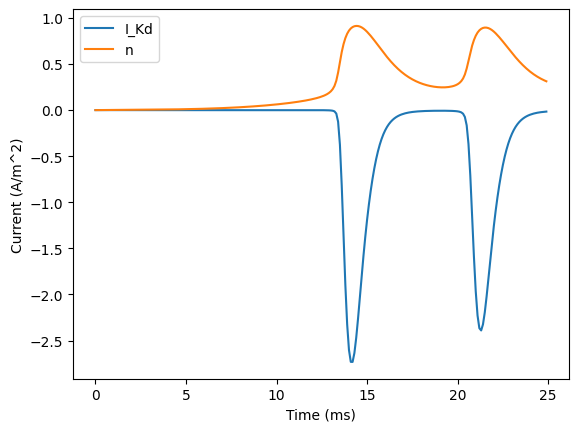

In [7]:
b2.start_scope()
morpho = b2.Cylinder(length=L, diameter=d, n=1, type='axon')
neuron = b2.SpatialNeuron(morphology=morpho, model=eqs,
                          method="exponential_euler")
neuron.vm = -75*b2.mV

#M = b2.StateMonitor(neuron, 'vm', record=True)
#M = b2.StateMonitor(neuron, ['I_Na', 'm', 'h'], record=True)
#M = b2.StateMonitor(neuron, ['I_Kd', 'n'], record=True)
M = b2.StateMonitor(neuron, ['I_M', 'p', 'tau'], record=True)

Iinj = 0.7*b2.nA/(b2.pi * L * d)  # current injection at one end
b2.run(25*b2.ms)

#plt.plot(M.t/b2.ms, M.vm[0]/b2.mV, label='Voltage')
#plt.xlabel('Time (ms)')
#plt.ylabel('Voltage (mV)')

#plt.plot(M.t/b2.ms, M.I_Na[0]/b2.amp/b2.metre**2, label='I_Na')
#plt.plot(M.t/b2.ms, M.m[0], label='m')
#plt.plot(M.t/b2.ms, M.h[0], label='h')
#plt.xlabel('Time (ms)')
#plt.ylabel('Current (A/m^2)')
#plt.legend()

#plt.plot(M.t/b2.ms, M.I_Kd[0]/b2.amp/b2.metre**2, label='I_Kd')
#plt.plot(M.t/b2.ms, M.n[0], label='n')
#plt.xlabel('Time (ms)')
#plt.ylabel('Current (A/m^2)')
#plt.legend()

plt.plot(M.t/b2.ms, M.I_M[0]/b2.amp/b2.metre**2, label='I_M')
plt.plot(M.t/b2.ms, M.p[0], label='p')
plt.plot(M.t/b2.ms, M.tau[0]/b2.second, label='tau')
plt.xlabel('Time (ms)')
plt.ylabel('Current (A/m^2)')
plt.legend()